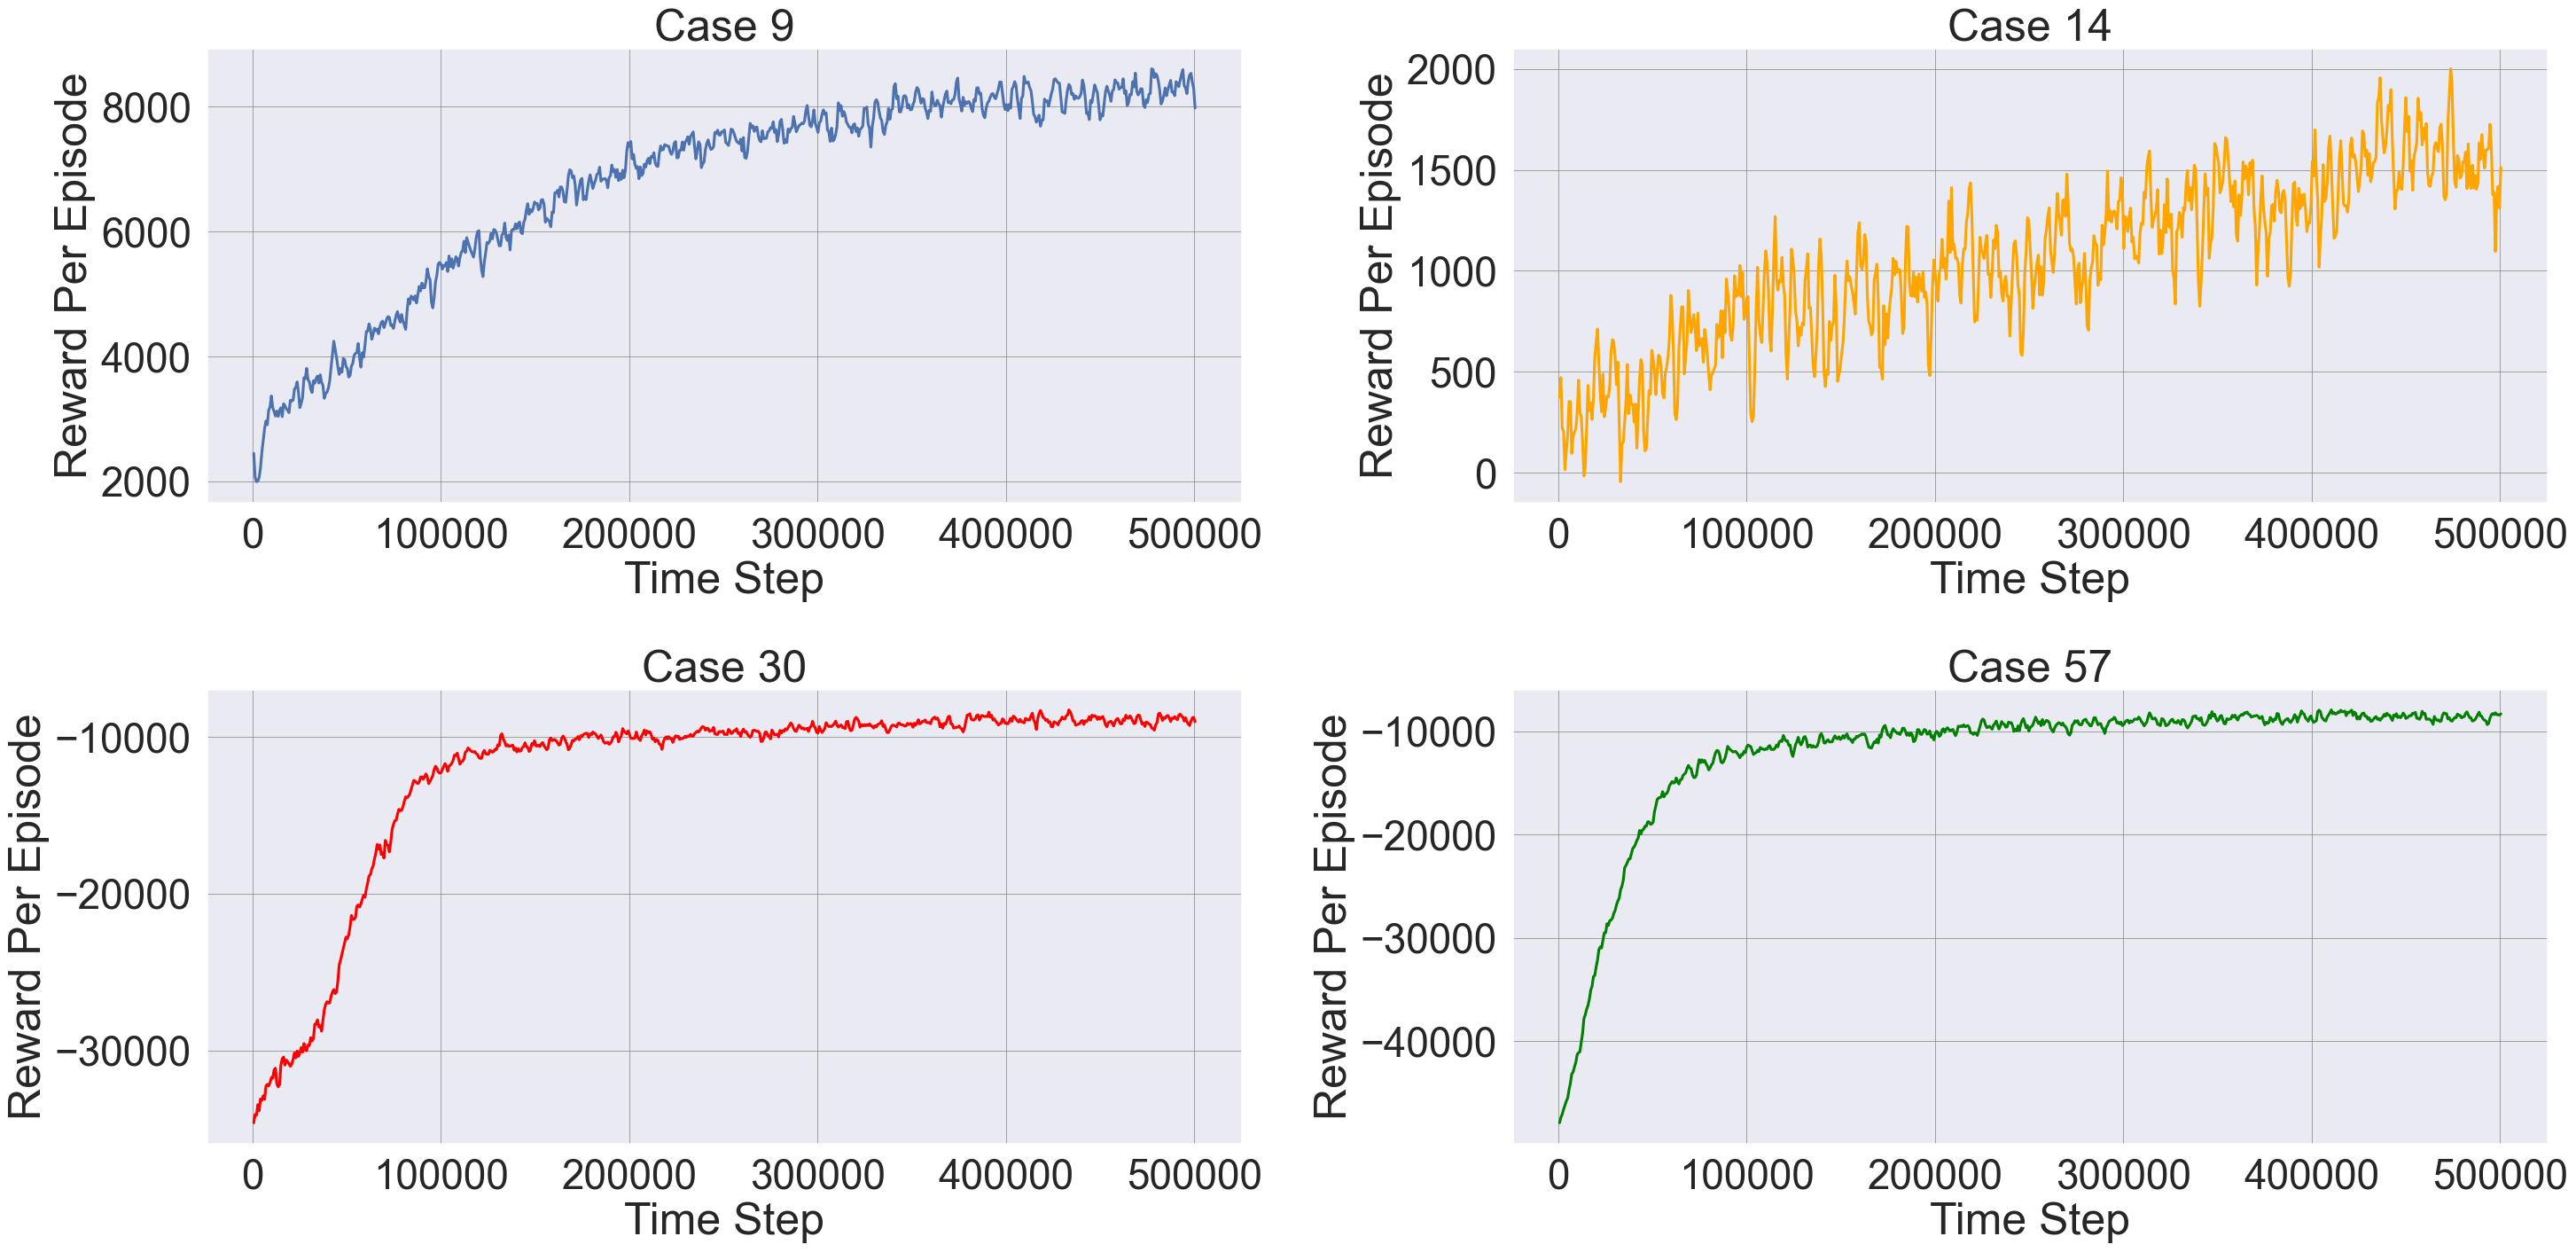

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df_case9 = pd.read_json("../Training/Logs/Logs_Case9_PPO_7.json")
df_case14 = pd.read_json("../Training/Logs/Logs_Case14_PPO_1.json")
df_case30 = pd.read_json("../Training/Logs/Logs_Case30_PPO_2.json")
df_case57 = pd.read_json("../Training/Logs/Logs_Case57_PPO_1.json")

# Rename the column 2
df_case9 = df_case9.rename(columns={2: 'Case 9'})
df_case14 = df_case14.rename(columns={2: 'Case 14'})
df_case30 = df_case30.rename(columns={2: 'Case 30'})
df_case57 = df_case57.rename(columns={2: 'Case 57'})

df_logs = pd.concat([df_case9, df_case14["Case 14"], df_case30["Case 30"], df_case57["Case 57"]], axis=1)
df_logs.head()

# Set the context to increase font size
sns.set_context("talk", font_scale=2)

# Plot four plots for each case with column 1 as x-axis
fig, axs = plt.subplots(2, 2, figsize=(30, 15))
sns.lineplot(x=1, y='Case 9', data=df_logs, ax=axs[0, 0], label='Case 9')
sns.lineplot(x=1, y='Case 14', data=df_logs, ax=axs[0, 1], label='Case 14', color="orange")
sns.lineplot(x=1, y='Case 30', data=df_logs, ax=axs[1, 0], label='Case 30', color="red")
sns.lineplot(x=1, y='Case 57', data=df_logs, ax=axs[1, 1], label='Case 57', color="green")

for ax in axs.flat:
    ax.set(xlabel='Time Step', ylabel='Reward Per Episode')
    ax.set_title(ax.get_legend_handles_labels()[1][0])
    ax.get_legend().remove()
    ax.grid(True, which='both', color='gray', linestyle='-', linewidth=0.5)

plt.tight_layout()
plt.show()


Text(0.5, 1.0, 'PPO Training')

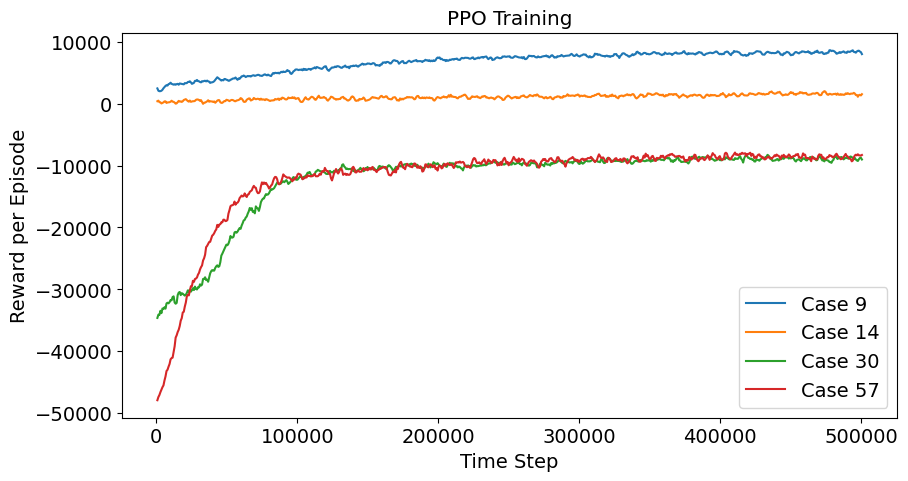

In [ ]:
plt.figure(figsize=(10, 5))
sns.lineplot(data=df_logs, x=1, y='Case 9', label='Case 9')
sns.lineplot(data=df_logs, x=1, y='Case 14', label='Case 14')
sns.lineplot(data=df_logs, x=1, y='Case 30', label='Case 30')
sns.lineplot(data=df_logs, x=1, y='Case 57', label='Case 57')

plt.xlabel("Time Step")
plt.ylabel("Reward per Episode")

plt.rcParams.update({'font.size': 12})  
plt.title("PPO Training")

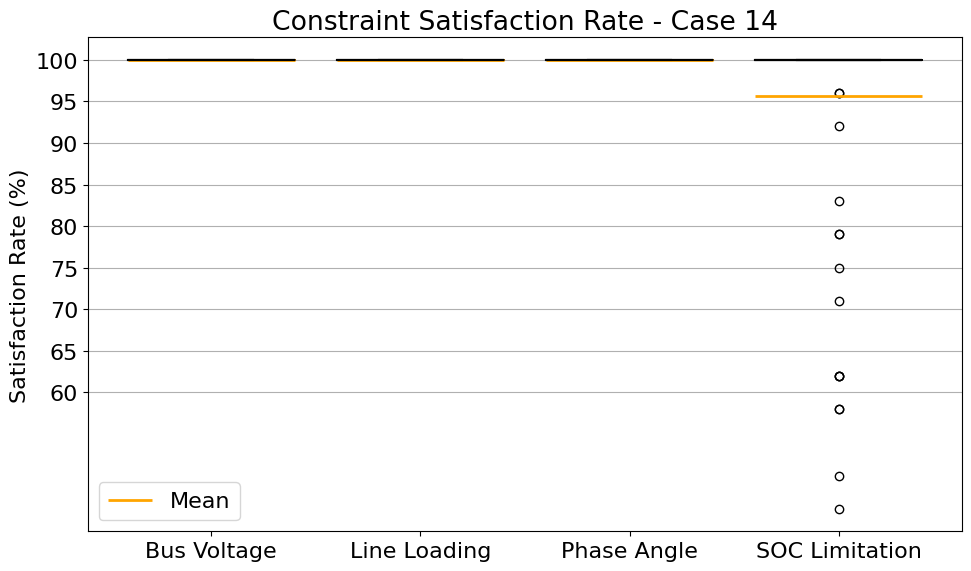

In [ ]:
import matplotlib.pyplot as plt
import pickle
import numpy as np
import pandas as pd
import seaborn as sns

n_case = 14
with open(f"../Evaluation/Case{n_case}/RL_metrics_Case{n_case}.pkl", 'rb') as f:
    dicts = pickle.load(f)
dicts.pop("Sample")
df = pd.DataFrame(dicts)
violation_cols = [col for col in df.columns if "violation" in col]
for col in violation_cols:
    df[col] = round((1-df[col]/24)*100)
means = df[violation_cols].mean()

plt.figure(figsize=(10, 6))
sns.boxplot(data=df[violation_cols], fill=False, color='black')
for i, mean in enumerate(means):
    plt.hlines(mean, i - 0.4, i + 0.4, colors='orange', linewidth=2, label='Mean' if i == 0 else "")
plt.ylabel('Satisfaction Rate (%)')
plt.title(f'Constraint Satisfaction Rate - Case {n_case}')
plt.xticks(ticks=range(len(violation_cols)), labels=["Bus Voltage", "Line Loading", "Phase Angle", "SOC Limitation"]) #, rotation=45)
plt.yticks(range(60, 101, 5))
plt.legend()
plt.rcParams.update({'font.size': 16})
plt.tight_layout()
plt.show()

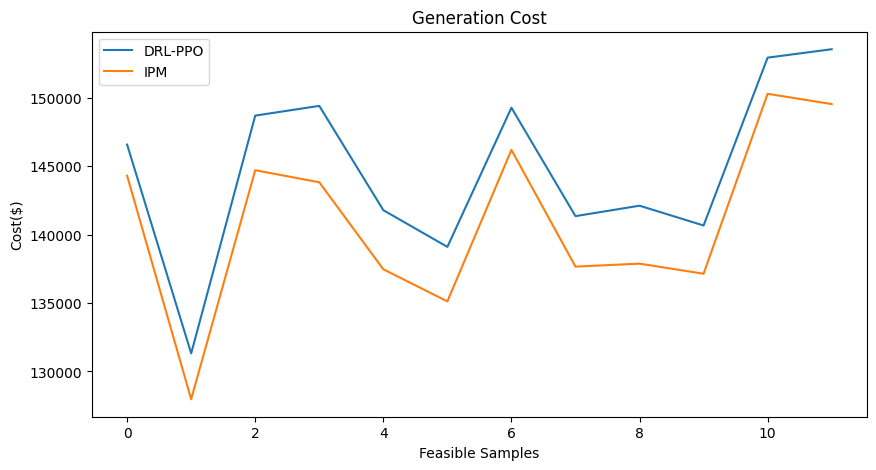

In [ ]:
import matplotlib.pyplot as plt
import pickle
import numpy as np
import pandas as pd
import seaborn as sns

n_case = 9
with open(f"../Evaluation/Case{n_case}/RL_metrics_Case{n_case}.pkl", 'rb') as f1:
    dicts_RL = pickle.load(f1)

# drop the "Sample" key
dicts_RL.pop("Sample")

with open(f"../Evaluation/Case{n_case}/IPM_metrics_Case{n_case}.pickle", 'rb') as f2:
    dicts_IPM = pickle.load(f2)

df_RL = pd.DataFrame(dicts_RL)
df_IPM = pd.DataFrame(dicts_IPM)

target_seeds = [0, 2, 5, 12, 17, 19, 20, 21, 25, 26, 28, 29]
target_metrics = ["Times", "Costs"]

df_RL = df_RL.loc[target_seeds][target_metrics]
df_RL.reset_index(drop=True, inplace=True)
df_RL.rename(columns={"Times" : "Time", "Costs" : "Cost"}, inplace=True)
df_IPM.rename(columns={"IPtime" : "Time"}, inplace=True)

plt.figure(figsize=(10, 5))
sns.lineplot(data=df_RL["Cost"], label='DRL-PPO')
sns.lineplot(data=df_IPM["Cost"], label='IPM')

plt.xlabel("Feasible Samples")
plt.ylabel("Cost($)")
plt.title("Generation Cost")
plt.show()

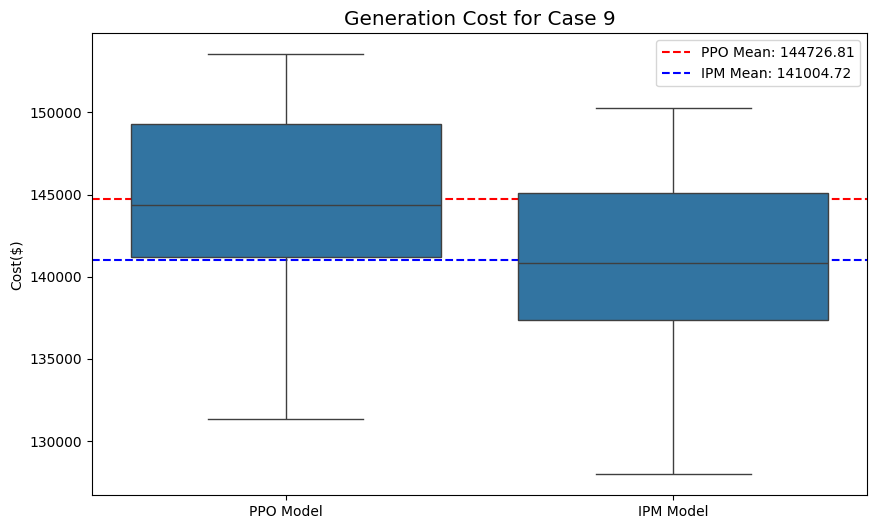

In [ ]:
import matplotlib.pyplot as plt
import pickle
import numpy as np
import pandas as pd
import seaborn as sns

n_case = 9
with open(f"../Evaluation/Case{n_case}/RL_metrics_Case{n_case}.pkl", 'rb') as f1:
    dicts_RL = pickle.load(f1)

# drop the "Sample" key
dicts_RL.pop("Sample")

with open(f"../Evaluation/Case{n_case}/IPM_metrics_Case{n_case}.pickle", 'rb') as f2:
    dicts_IPM = pickle.load(f2)


# convert to dataframe
df_RL = pd.DataFrame(dicts_RL)
df_IPM = pd.DataFrame(dicts_IPM)

target_seeds = [0, 2, 5, 12, 17, 19, 20, 21, 25, 26, 28, 29]
target_metrics = ["Times", "Costs"]

df_RL = df_RL.loc[target_seeds][target_metrics]
df_RL.reset_index(drop=True, inplace=True)
df_RL.rename(columns={"Times" : "Time", "Costs" : "Cost"}, inplace=True)
df_IPM.rename(columns={"IPtime" : "Time"}, inplace=True)

df_RL['Model'] = 'PPO Model'
df_IPM['Model'] = 'IPM Model'

df_combined = pd.concat([df_RL[['Cost', 'Model']], df_IPM[['Cost', 'Model']]], ignore_index=True)

plt.figure(figsize=(10, 6))
mean_val_ppo = df_combined[df_combined['Model'] == 'PPO Model']['Cost'].mean()
mean_val_ipm = df_combined[df_combined['Model'] == 'IPM Model']['Cost'].mean()
plt.axhline(mean_val_ppo, color='r', linestyle='--', label=f'PPO Mean: {mean_val_ppo:.2f}')
plt.axhline(mean_val_ipm, color='b', linestyle='--', label=f'IPM Mean: {mean_val_ipm:.2f}')
plt.legend()
sns.boxplot(x='Model', y='Cost', data=df_combined)
plt.xlabel('')
plt.rcParams.update({'font.size': 12})  
plt.ylabel('Cost($)')
plt.title('Generation Cost for Case 9')
plt.show()

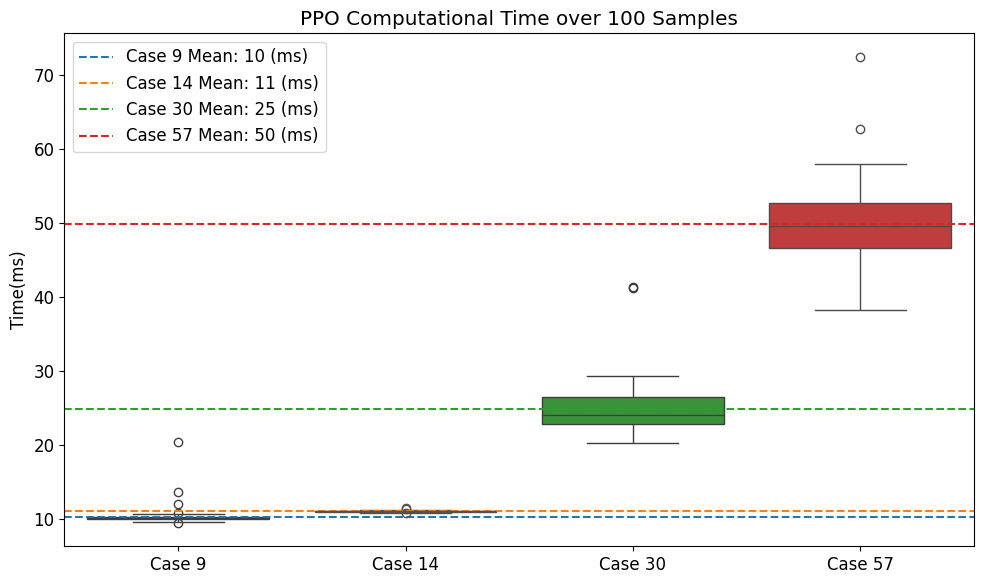

In [ ]:
import matplotlib.pyplot as plt
import pickle
import numpy as np
import pandas as pd
import seaborn as sns

dicts = {}
for n_case in [9, 14, 30, 57]:
    with open(f"../Evaluation/Case{n_case}/RL_metrics_Case{n_case}.pkl", 'rb') as f1:
        dicts_RL = pickle.load(f1)
    dicts_RL.pop("Sample")
    dicts[n_case] = dicts_RL

plt.figure(figsize=(10, 6))
for i, n_case in enumerate(dicts.keys()):
    df = pd.DataFrame(dicts[n_case])
    df['Case'] = f"Case {n_case}"
    df["Times"] = df["Times"] * 1000
    sns.boxplot(x='Case', y='Times', data=df)
    mean_val = df['Times'].mean()
    plt.axhline(mean_val, color=f'C{i}', linestyle='--', label=f'Case {n_case} Mean: {mean_val:.0f} (ms)')
plt.ylabel('Time(ms)')
plt.title('PPO Computational Time over 100 Samples')
plt.legend()
plt.xlabel('')
plt.tight_layout()
plt.show()

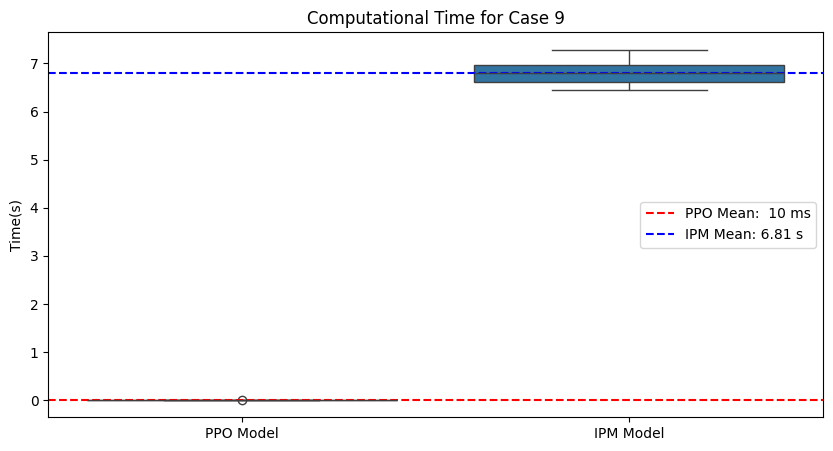

In [ ]:
import matplotlib.pyplot as plt
import pickle
import numpy as np
import pandas as pd
import seaborn as sns

n_case = 9
with open(f"../Evaluation/Case{n_case}/RL_metrics_Case{n_case}.pkl", 'rb') as f1:
    dicts_RL = pickle.load(f1)

dicts_RL.pop("Sample")

with open(f"../Evaluation/Case{n_case}/IPM_metrics_Case{n_case}.pickle", 'rb') as f2:
    dicts_IPM = pickle.load(f2)

df_RL = pd.DataFrame(dicts_RL)
df_IPM = pd.DataFrame(dicts_IPM)
target_seeds = [0, 2, 5, 12, 17, 19, 20, 21, 25, 26, 28, 29]
target_metrics = ["Times", "Costs"]
df_RL = df_RL.loc[target_seeds][target_metrics]
df_RL.reset_index(drop=True, inplace=True)
df_RL.rename(columns={"Times" : "Time", "Costs" : "Cost"}, inplace=True)
df_IPM.rename(columns={"IPtime" : "Time"}, inplace=True)
df_RL['Model'] = 'PPO Model'
df_IPM['Model'] = 'IPM Model'
df_combined = pd.concat([df_RL[['Time', 'Model']], df_IPM[['Time', 'Model']]], ignore_index=True)
mean_val_ppo = df_combined[df_combined['Model'] == 'PPO Model']['Time'].mean()
mean_val_ipm = df_combined[df_combined['Model'] == 'IPM Model']['Time'].mean()

plt.figure(figsize=(10, 5))
sns.boxplot(x='Model', y='Time', data=df_combined)
plt.axhline(mean_val_ppo, color='r', linestyle='--', label=f'PPO Mean: {mean_val_ppo * 1000: .0f} ms')
plt.axhline(mean_val_ipm, color='b', linestyle='--', label=f'IPM Mean: {mean_val_ipm:.2f} s')
plt.legend()
plt.xlabel('')
plt.ylabel('Time(s)')
plt.title('Computational Time for Case 9')
plt.show()

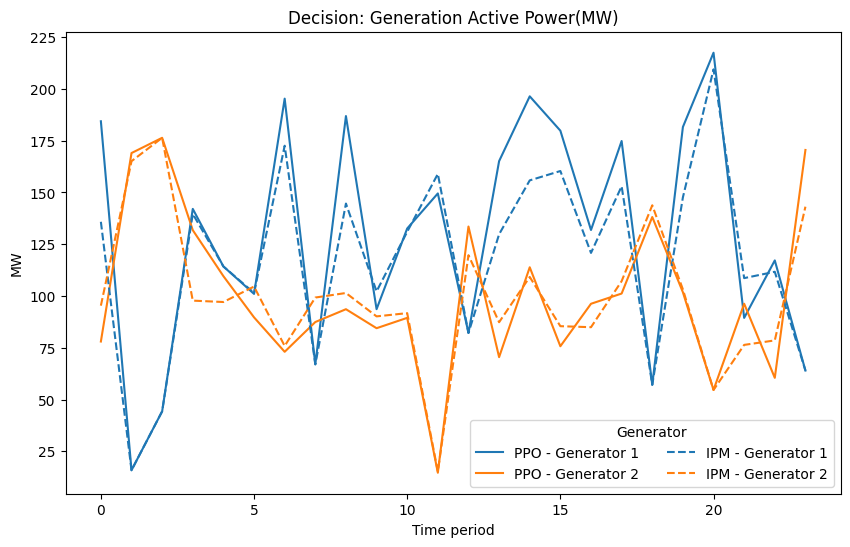

In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import os

target_seeds = [0, 2, 5, 12, 17, 19, 20, 21, 25, 26, 28, 29]
n_case = 9
seed = target_seeds[0]
file_path = f"../Evaluation/Case{n_case}/{seed}"
df_load_p = pd.read_csv(os.path.join(file_path, "load_p.csv"))
df_load_q = pd.read_csv(os.path.join(file_path, "load_q.csv"))
df_renew = pd.read_csv(os.path.join(file_path, "renewable.csv"))
df_ev_demand = pd.read_csv(os.path.join(file_path, "ev_demand.csv"))
df_ev_soc = pd.read_csv(os.path.join(file_path, "ev_soc.csv"))
df_ev_soc = df_ev_soc * 100
df_gen_p = pd.read_csv(os.path.join(file_path, "gen_p.csv"))
df_gen_v = pd.read_csv(os.path.join(file_path, "gen_v.csv"))
df_ev_action = pd.read_csv(os.path.join(file_path, "ev_action.csv"))
df_gen_p_IPM = pd.read_csv(os.path.join(file_path, "IPM_gen_p.csv"))
df_ev_action_IPM = pd.read_csv(os.path.join(file_path, "IPM_charge.csv"))
df_ev_soc_IPM = pd.read_csv(os.path.join(file_path, "IPM_soc.csv"))
df_gen_p_IPM.drop(columns=["Unnamed: 0"], inplace=True)
df_ev_action_IPM.drop(columns=["Unnamed: 0"], inplace=True)
df_ev_soc_IPM.drop(columns=["Unnamed: 0"], inplace=True)

plt.figure(figsize=(10, 6))
colors = sns.color_palette(None, len(df_gen_p.columns))
for idx, column in enumerate(df_gen_p.columns):
    sns.lineplot(data=df_gen_p, x=df_gen_p.index, y=column, label=f'PPO - Generator {int(column)+1}', color=colors[idx])
for idx, column in enumerate(df_gen_p_IPM.columns):
    sns.lineplot(data=df_gen_p_IPM, x=df_gen_p_IPM.index, y=column, label=f'IPM - Generator {int(column)+1}', color=colors[idx], linestyle='--')
plt.title("Decision: Generation Active Power(MW)")
plt.xlabel("Time period")
plt.ylabel("MW")
plt.legend(title="Generator", loc='lower right', ncol=2)
plt.show()

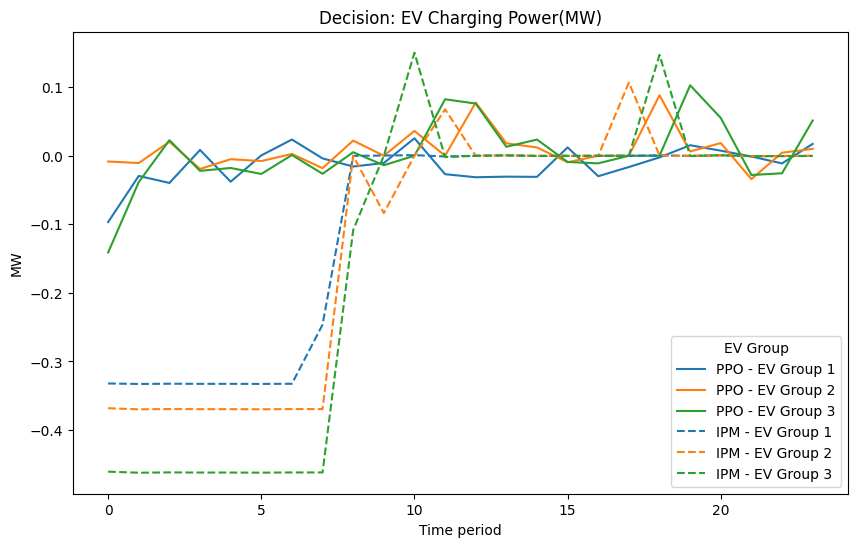

In [6]:
plt.figure(figsize=(10, 6))
colors = sns.color_palette(None, len(df_ev_action.columns))
for idx, column in enumerate(df_ev_action.columns):
    sns.lineplot(data=df_ev_action, x=df_ev_action.index, y=column, label=f'PPO - EV Group {int(column)+1}', color=colors[idx])
for idx, column in enumerate(df_ev_action_IPM.columns):
    sns.lineplot(data=df_ev_action_IPM, x=df_ev_action_IPM.index, y=column, label=f'IPM - EV Group {int(column)+1}', color=colors[idx], linestyle='--')
plt.title("Decision: EV Charging Power(MW)")
plt.xlabel("Time period")
plt.ylabel("MW")
plt.legend(title="EV Group", loc='lower right')
plt.show()

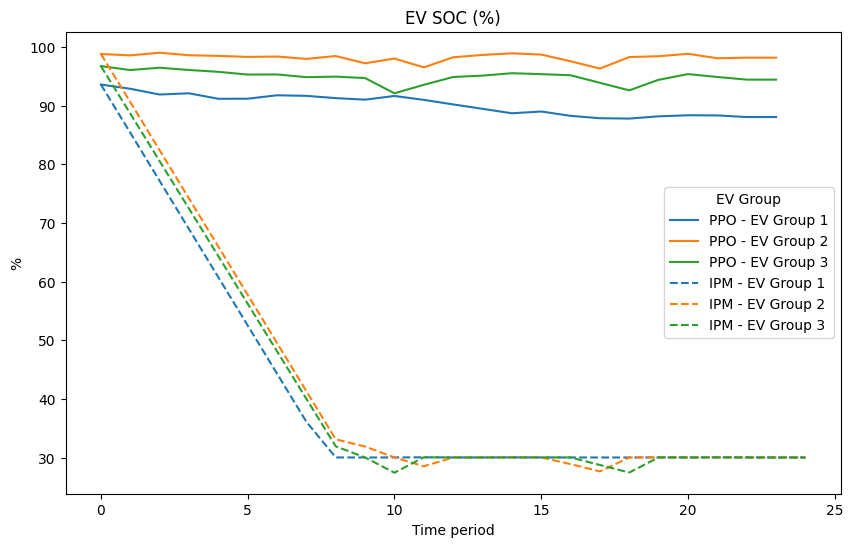

In [5]:
plt.figure(figsize=(10, 6))
colors = sns.color_palette(None, len(df_ev_soc.columns))
for idx, column in enumerate(df_ev_soc.columns):
    sns.lineplot(data=df_ev_soc, x=df_ev_soc.index, y=column, label=f'PPO - EV Group {int(column)+1}', color=colors[idx])
for idx, column in enumerate(df_ev_soc_IPM.columns):
    sns.lineplot(data=df_ev_soc_IPM, x=df_ev_soc_IPM.index, y=column, label=f'IPM - EV Group {int(column)+1}', color=colors[idx], linestyle='--')
plt.title("EV SOC (%)")
plt.xlabel("Time period")
plt.ylabel("%")
plt.legend(title="EV Group", loc='center right', bbox_to_anchor=(1, 0.5))
plt.show()